<br><span style="color:blue; font-size:50px">Heart Disease Prediction</span><br><br><br>
<span style="color:blue; font-size:36px">Introduction</span><br><br>
<span style="color:black; font-size:18px">Among various life-threatening diseases, heart disease has garnered a great deal of attention in medical research. The diagnosis of heart disease is a challenging task, which can offer automated prediction about the heart condition of patient so that further treatment can be made effective. The diagnosis of heart disease is usually based on signs, symptoms and physical examination of the patient. There are several factors that increase the risk of heart disease, such as smoking habit, body cholesterol level, family history of heart disease, obesity, high blood pressure, and lack of physical exercise.</span><br><br>
<span style="color:black; font-size:18px">A major challenge faced by health care organizations, such as hospitals and medical centers, is the provision of quality services at affordable costs.The quality service implies diagnosing patients properly and administering effective treatments. The available heart disease database consists of both numerical and categorical data. Before further processing, cleaning and filtering are applied on these records in order to filter the irrelevant data from the database. The proposed system can determine an exact hidden knowledge, ie, patterns and relationships associated with heart disease from a historical heart disease database. It can also answer the complex queries for diagnosing heart disease; therefore, it can be helpful to health care practitioners to make intelligent clinical decisions. Results showed that the proposed system has its unique potency in realizing the objectives of the defined mining goals.</span>


<span style="color:blue; font-size:22px">=======================================================================</span><br><br>
<span style="color:blue; font-size:40px">Dataset Description</span><br><br>
<span style="color:black; font-size:18px">The data are collected from a standard dataset that contains 303 records, it is consist of 14 parameters divided into numerical and categorical data describing each record stutas. The 14 parameters, such as age, sex, chest pain type (CP), and cholesterol (chol), with some domain values associated with them, considered to predict the probability of heart disease. (table-1)</span><br><br>
<span style="color:green; font-size:16px">First we need to import some python libraries such as sklearn and plotly in order to process the data and plot some graphs:</span>

In [3]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import warnings
warnings.filterwarnings('ignore')


<span style="color:green; font-size:16px">We can make use of pandas and cufflinks libraries to work with our offline data(downloaded) and read from it as shown in the table-1 below.</span>

In [4]:
#loading the dataset
pyo.init_notebook_mode(connected=True)
cf.go_offline()
df=pd.read_csv(r'C:\Users\H\Datamining\heart_disease_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<span style="color:green; font-size:18px">
Here is the information of this Dataset:</span><br><br>
<span style="color:black; font-size:16px">
age = age in years<br />
sex = (1 = male; 0 = female)<br />
cp= chest pain type<br />
trestbps= resting blood pressure (in mm Hg on admission to the hospital)<br />
chol = serum cholestoral in mg/dl<br />
fbs = ( fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br />
restecg = resting electrocardiographic results<br />
thalach = maximum heart rate achieved<br />
exang = exercise induced angina (1 = yes; 0 = no)<br />
oldpeak = ST depression induced by exercise relative to rest<br />
slope = the slope of the peak exercise ST segment<br />
ca = number of major vessels (0-4) colored by flouroscopy<br />
thal 3 = normal; 6 = fixed defect; 7 = reversable defect<br />
target (label) = 1 or 0 (1=True or has disease, 0=False)</span>

<span style="color:green; font-size:16px">The table below describes some usefull information about the data such as its mean, max and min.</span>

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<span style="color:green; font-size:16px">Now we will check for null values in our data.(missing values)</span>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<span style="color:green; font-size:16px">From the results above, no missing values exist in our dataset. Let's see how many people are diagnosed as having heart disease(target=1).</span>

In [7]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

<span style="color:green; font-size:16px">Our data contains 165 people out of 303 diagnosed as having heart disease. For more visualization we will show you how the data is distributed using graphs. Each graph of the following describes one parameter of table-1.</span>

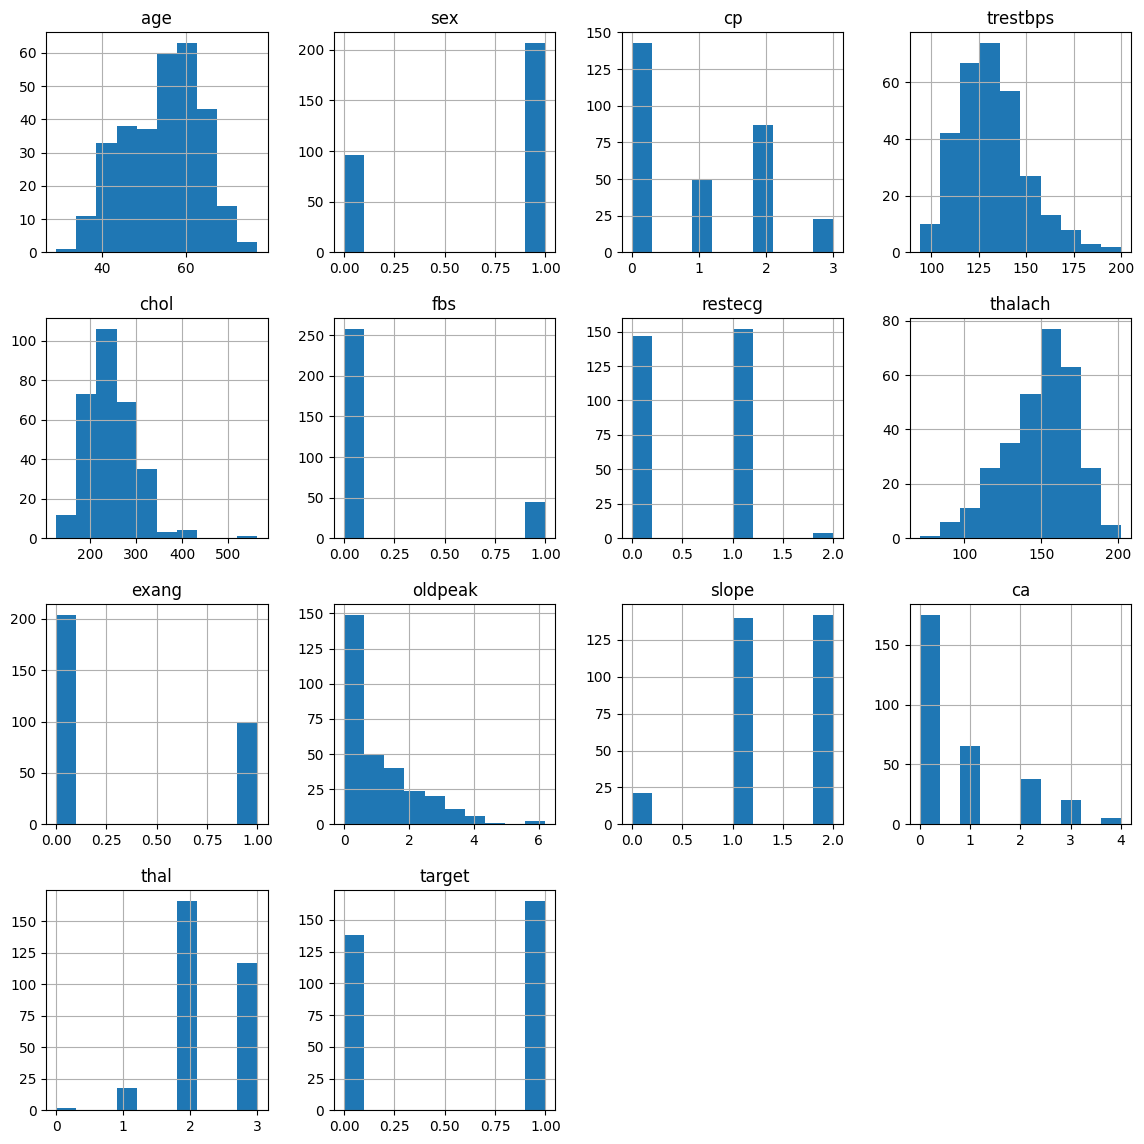

In [8]:
df.hist(figsize=(14,14))
plt.show()

<br><span style="color:green; font-size:16px">The gragh below shows how many male and female was diagnosed as having the disease. (1 on x-axis for male and orange for having disease)</span>

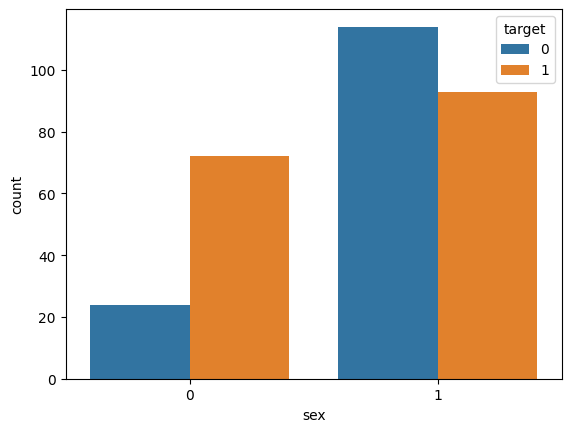

In [9]:
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

<span style="color:green; font-size:16px">finally let's take a look at the correlation between our numerical data categories.</span>

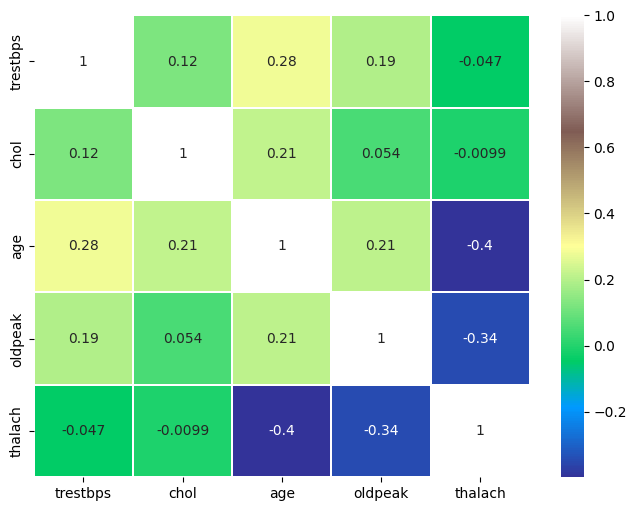

In [10]:
numeric_columns=['trestbps','chol','age','oldpeak','thalach']
# create a correlation heatmap
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

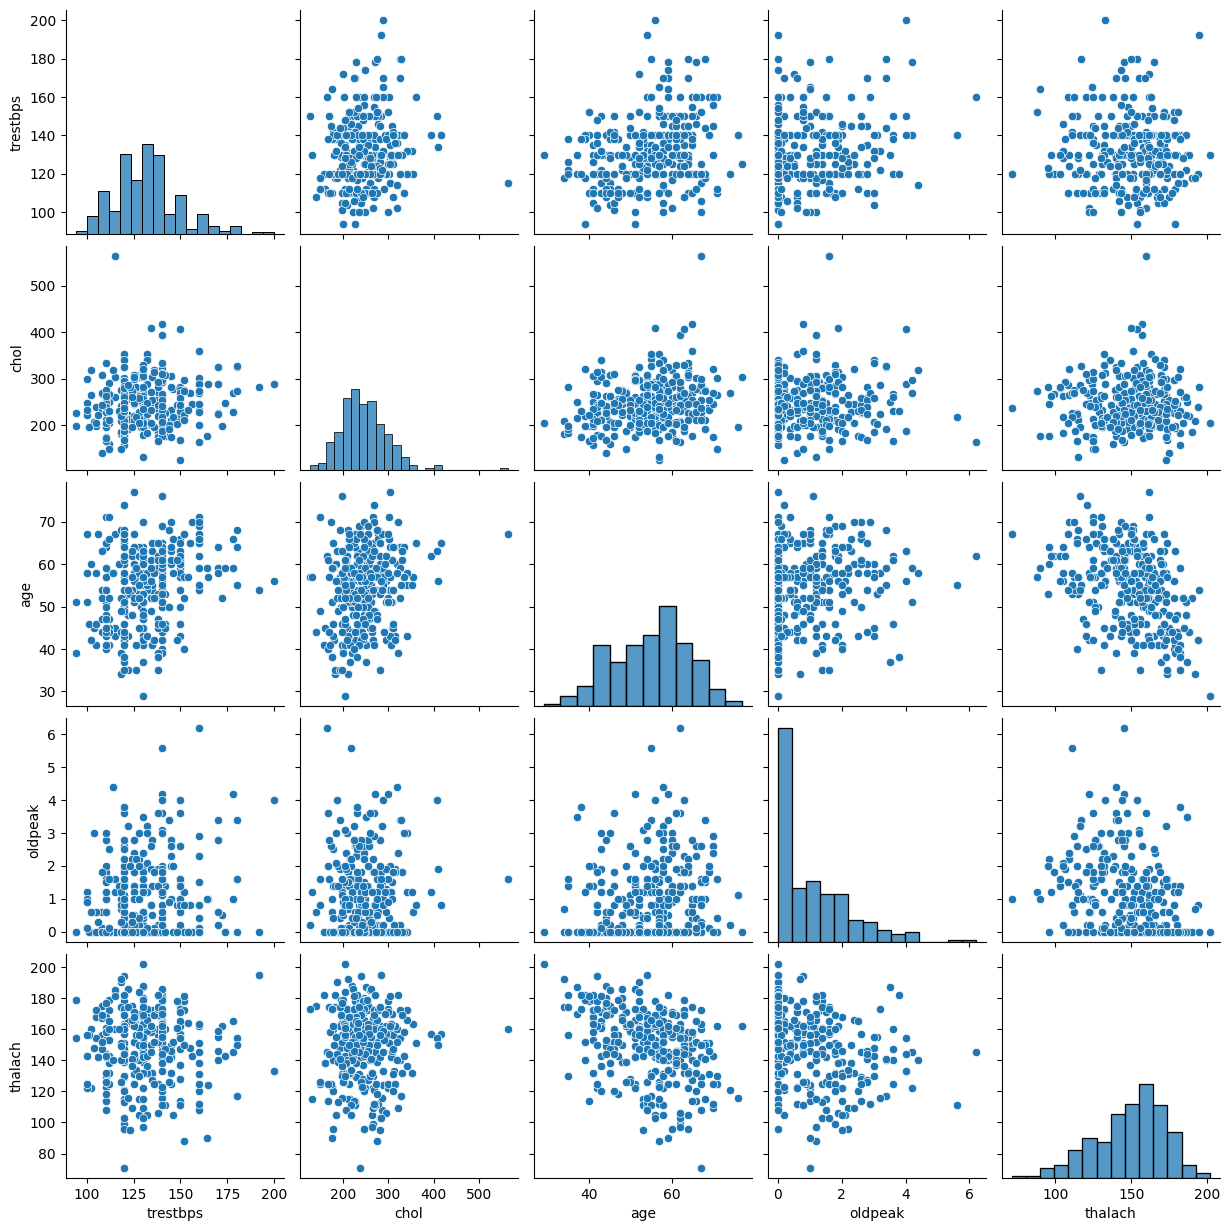

In [11]:
sns.pairplot(df[numeric_columns])
plt.show()

<span style="color:blue; font-size:22px">=======================================================================</span><br><br>
<span style="color:blue; font-size:40px">Dataset Preprocessing and Algorithms</span><br><br>

<span style="color:black; font-size:18px">The dataset is preprocessed and trained using two different algorithms.The first algorithm is a clustering method and it is called K-means, and the second is a classification method and it is called KNN (K-Nearest Neighbours).</span><br><br>
<span style="color:green; font-size:16px">First we need to divide the data into two groups one for training( 70% of the data) and one (30%) is used for testing. Each group is divided into actual data (x) and target data (y).<br /><br />
But before we apply any algorithm we need to normalize/standardize our data to remove the mean and scale each feature/variable to unit variance. Since the variables that are measured at different scales do not contribute equally to the model fitting.</span>

In [12]:
#Storing the data into two variable x(actual data)and y(target data)

x, y = df.iloc[:, :-1], df.iloc[:, -1]

#standarizing the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

#dividing the data

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

print('x_test:\n'+ str(x_test),'\ny_test:\n'+ str(y_test))

print ("\ntrain_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

x_test:
[[ 0.18017482 -1.46841752 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.40075247  0.68100522  1.00257707 ... -0.64911323  0.26508221
   1.12302895]
 [ 1.06248543  0.68100522  1.00257707 ... -0.64911323 -0.71442887
   1.12302895]
 ...
 [ 0.29046364  0.68100522  1.00257707 ... -0.64911323  0.26508221
   1.12302895]
 [-0.26098049  0.68100522  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 [ 0.62133012  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]] 
y_test:
246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


<span style="color:blue; font-size:22px">===================================</span><br><br>
<br><span style="color:blue; font-size:30px">K-means</span><br><br>
<span style="color:black; font-size:18px">K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.The k-means algorithm works as following:</span><br><br>

<span style="color:green; font-size:18px">
    

Step-1: Select the number K to decide the number of clusters.<br />

Step-2: Select random K points or centroids.<br />

Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters. <br />

Step-4: Calculate the variance and place a new centroid of each cluster.<br />

Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.<br />

Step-6: If any reassignment occurs, then go to step-4 else go to finish.<br />

Step-7: The model is ready.
</span><br>

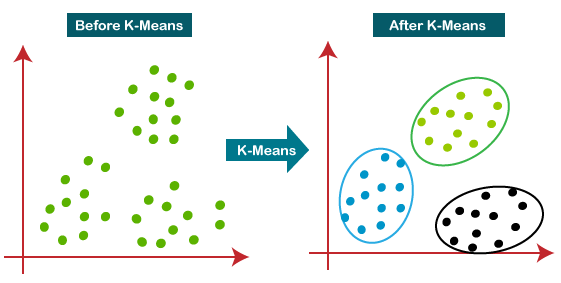
<br><br><br>

<span style="color:green; font-size:16px">Since in our data we only have two clusters (target is 0 or 1), we will choose k equals to 2 and build the k-means model.</span><br><br>

In [13]:
#importing kmeans from sklearn library
from sklearn.cluster import KMeans

In [14]:
#creating the K-means model
kmeans=KMeans(n_clusters=2, random_state= 1)
#training the data 
kmeans.fit(x_train,y_train)
#testing
prediction_kmeans=kmeans.predict(x_test)
#computing the model accuracy
accuracy_kmeans=accuracy_score(y_test,prediction_kmeans)

print('The accuracy of M-means with k equal to 2 is',accuracy_kmeans*100)

The accuracy of M-means with k equal to 2 is 75.82417582417582


In [15]:
#showing accuracy and mean square error

print('accuracy_score      : ',accuracy_score(y_test,prediction_kmeans)*100,'%')
print('mean_squared_error  : ',mean_squared_error(y_test,prediction_kmeans)*100,'%')

accuracy_score      :  75.82417582417582 %
mean_squared_error  :  24.175824175824175 %


<span style="color:green; font-size:16px">The results show that the accuracy of k_means algorithm is equal to 75.82%. Lets predict a ramdom sample from the table_1.</span>

In [16]:
#generating a random instant

x_kmeans=np.array([[41 ,0, 1,130,204,0,0,172,0,1.4,2,0,2]])  #target=1
#standardize
x_kmeans=sc.transform(x_kmeans)
#predict
x_kmeans_prediction=kmeans.predict(x_kmeans)
x_kmeans

array([[-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188]])

In [17]:
print('target=',(x_kmeans_prediction[0]))

target= 1


<span style="color:blue; font-size:22px">===================================</span><br><br>
<br><span style="color:blue; font-size:30px">K-Nearest Neighbours</span><br><br>
<span style="color:black; font-size:18px">The k-nearest neighbor algorithm has non-linear prediction boundaries as it’s a non-linear classifier. It predicts the class of a new test data point by finding its k nearest neighbours class. You’d select the k nearest neighbours of a test data point by using the Euclidean distance. In the k nearest neighbours, you’d have to count the number of data points present in different categories, and you’d assign the new data point to the category with the most neighbors.The kNN algorithm works as following:</span><br><br>

<span style="color:green; font-size:16px">
    
Step-1: Select the number K of the neighbors<br />
Step-2: Calculate the Euclidean distance of K number of neighbors<br />
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.<br />
Step-4: Among these k neighbors, count the number of the data points in each category.<br />
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.<br />
Step-6: The model is now ready.<br /></span><br>

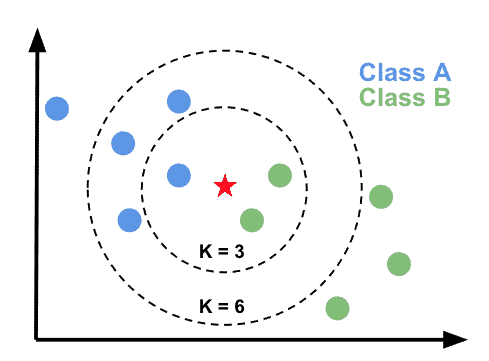
<br><br><br>

<span style="color:green; font-size:16px">Now let's apply the KNN algorithm in k range from 1 to 26 in order to find the best k value for this data. Each k value will have a different accuracy value (score). We will then choose the k value based on the best accuracy result for the alghorithm.</span>

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#apllying knn in range 1 to 26
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction_knn=knn.predict(x_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))

print('The best value of k is {} with score : {}'.format(best_k,h_score))
scores

The best value of k is 4 with score : 0.8571428571428571


{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.8241758241758241,
 4: 0.8571428571428571,
 5: 0.8131868131868132,
 6: 0.8021978021978022,
 7: 0.8021978021978022,
 8: 0.8241758241758241,
 9: 0.7802197802197802,
 10: 0.7802197802197802,
 11: 0.7802197802197802,
 12: 0.7912087912087912,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7802197802197802,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7912087912087912,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

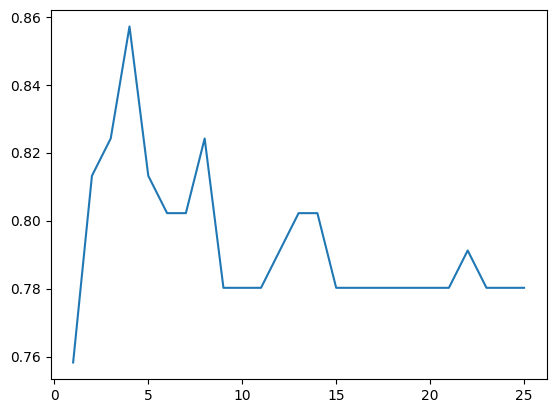

In [20]:
#plot the result
plt.plot(k_range,scores_list)
plt.show()

<span style="color:green; font-size:16px">The results show that the best accuracy is equal to 85.71% when k is equal to 4. We will now set k=4 and apply the algorithm.</span>

In [21]:
#applying KNN with k=4

knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
#showing accuracy and mean square error

prediction_knn=knn.predict(x_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score      : ',accuracy_knn,'%')
print('mean_squared_error  : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score      :  85.71428571428571 %
mean_squared_error  :  14.285714285714285 %


In [23]:
#showing the accuracy on training and testing datasets

print("Accuracy on training set: {:.3f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(x_test, y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.857


<span style="color:green; font-size:16px">Finally let's predict a random instant from the data and see what we will get.(the result should give 1 or has the disease)</span>

In [24]:
#generating a random instant

x_knn=np.array([[41 ,0, 1,130,204,0,0,172,0,1.4,2,0,2]])  #target=1
#standardize
x_knn=sc.transform(x_knn)


In [25]:
#predict
x_knn_prediction=knn.predict(x_knn)
x_knn

array([[-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188]])

In [26]:
print('target=',(x_knn_prediction[0]))

target= 1


<span style="color:blue; font-size:22px">=======================================================================</span><br><br>
<span style="color:blue; font-size:40px">Conclusion</span><br><br>

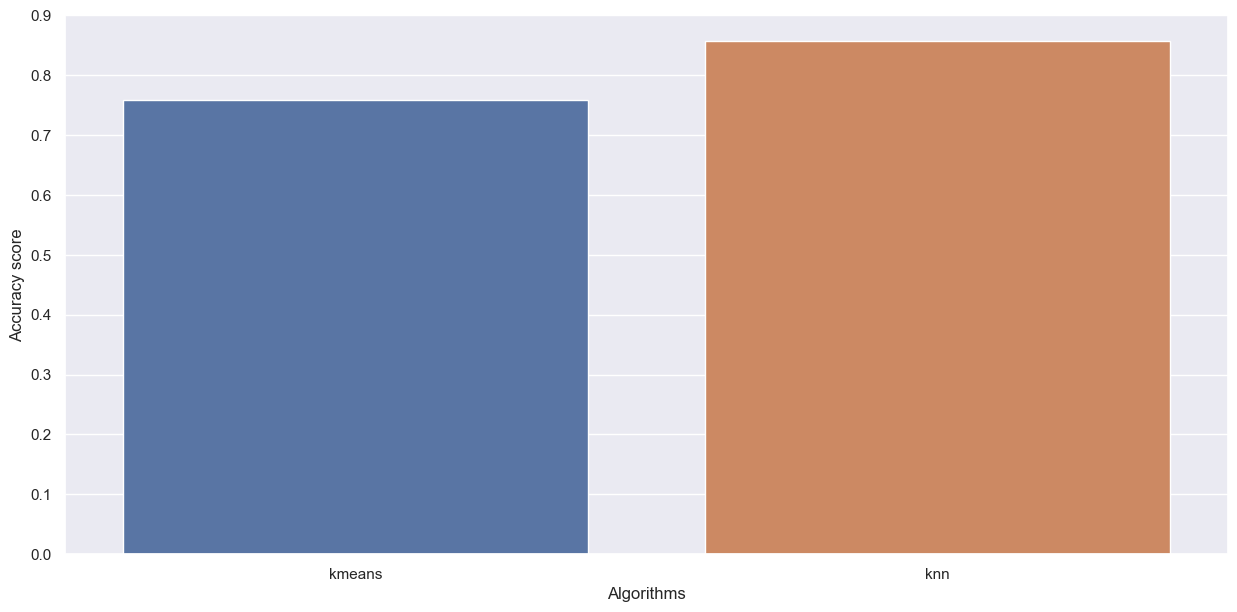

In [27]:
#accuracy of the algorithms
scores_dict = {}
scores_dict['kmeans'] = accuracy_score(y_test,prediction_kmeans)
scores_dict['knn'] = accuracy_score(y_test,prediction_knn)
#plotting the accuracy
with sns.color_palette('muted'):
  algo_name= list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(x=algo_name,y=scoress)

<span style="color:black; font-size:18px">An early diagnosis is so essential for health care, especially when it comes to a critical health condition such as heart disease. In this project we learned about some data mining techniques that could be useful in health care industry when a collection of clear and organized data is provided. The two models we applied on the dataset show different results in the accuracy due to several aspects such as the shape of the data and the number of features. The results show that the knn model has a higher accuracy score (85.71%) than the K-means model (75.82%) for this dataset.</span><br><br>